### Reconstruction of Image A with nnf obtained from Image A and Image B.

In [1]:
import cv2
import matplotlib.pyplot as plt
import os, sys

from nnf import NNF

In [ ]:
def reconstruct_img(img1, img2, output_path):
    """
    Reconstruct the image using the nearest neighbor field
    """
    h, w = img1.shape[:2]
    output = img1.copy()
    patch_match = NNF(img1, img2, patch_w=7, pm_iters=5)
    nnf, nnf_dist = patch_match.compute_nnf()

    for ay in range(h - 7 + 1):
        for ax in range(w - 7 + 1):
            bx, by = nnf[ay, ax]
            output[ay:ay + 7, ax:ax + 7] = img2[by:by + 7, bx:bx + 7]

    cv2.imwrite(output_path, output)
    return output

In [4]:
img1 = cv2.imread('../images/a.png')
img2 = cv2.imread('../images/b.png')

recon = reconstruct_img(img1, img2, '../images/reconstructed_a_using_b.png')

Iteration 0 done in 7.086000 seconds
Iteration 1 done in 7.178831 seconds
Iteration 2 done in 7.013870 seconds
Iteration 3 done in 7.040297 seconds
Iteration 4 done in 6.988091 seconds


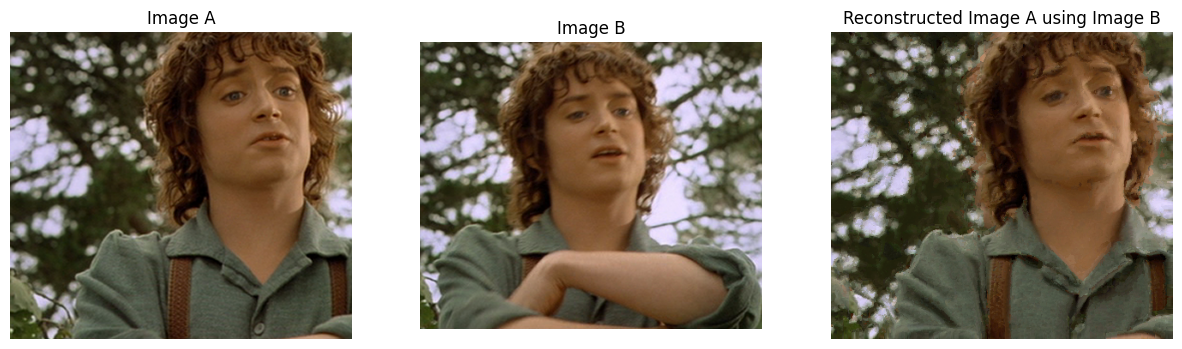

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image A')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image B')
ax[1].axis('off')

ax[2].imshow(cv2.cvtColor(recon, cv2.COLOR_BGR2RGB))
ax[2].set_title('Reconstructed Image A using Image B')
ax[2].axis('off')

plt.show()
